In [ ]:
# Import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import  MinMaxScaler

plt.style.use('seaborn')

# **Load the data**

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
# print data

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check the shape of dataset

print(df.shape)

(303, 14)


In [ ]:
# Check for unique values in all the columns
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
# Information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Description of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


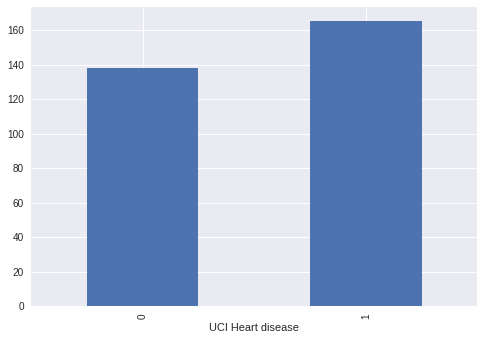

In [ ]:
df.target.value_counts().sort_values().plot(kind = 'bar',xlabel='UCI Heart disease')


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# **Data Preprocessing**

## Checking for Null Values

In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Check for Duplicate Values

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# replace 0=female to 2=female
df['sex'] = df['sex'].replace({0:2})

In [ ]:
# One hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

encoded_df = pd.DataFrame(encoder.fit_transform(df[['cp','ca','thal']]).astype(int))

encoded_df.columns = encoder.get_feature_names(['cp','ca','thal'])

df.drop(['cp','ca','thal'] ,axis=1, inplace=True)

encoded_data = pd.concat([df, encoded_df ], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
encoded_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,41,2,130,204,0,0,172,0,1.4,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,57,2,120,354,0,1,163,1,0.6,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0


## Normalize the Data

In [ ]:
# Standardization
columns_to_standardize = ['age', 'trestbps', 'chol','thalach','oldpeak','slope']

encoded_data[columns_to_standardize] = MinMaxScaler().fit_transform(encoded_data[columns_to_standardize])
encoded_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,1,0.481132,0.244292,1,0,0.603053,0,0.370968,0.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,0.166667,1,0.339623,0.283105,0,1,0.885496,0,0.564516,0.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,0.250000,2,0.339623,0.178082,0,0,0.770992,0,0.225806,1.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0.562500,1,0.245283,0.251142,0,1,0.816794,0,0.129032,1.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0.583333,2,0.245283,0.520548,0,1,0.702290,1,0.096774,1.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

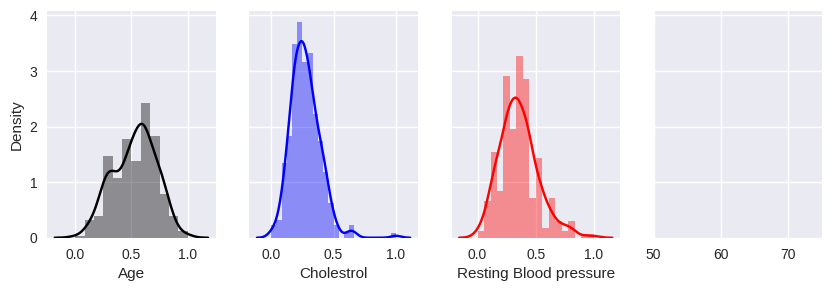

In [ ]:
# Distributions of standardized columns
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(encoded_data['age'] , color="black", ax=axes[0], axlabel='Age')
sns.distplot(encoded_data['chol'] , color="blue", ax=axes[1], axlabel='Cholestrol')
sns.distplot(encoded_data['trestbps'] , color="red", ax=axes[2], axlabel='Resting Blood pressure')
plt.xlim(50,75);plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

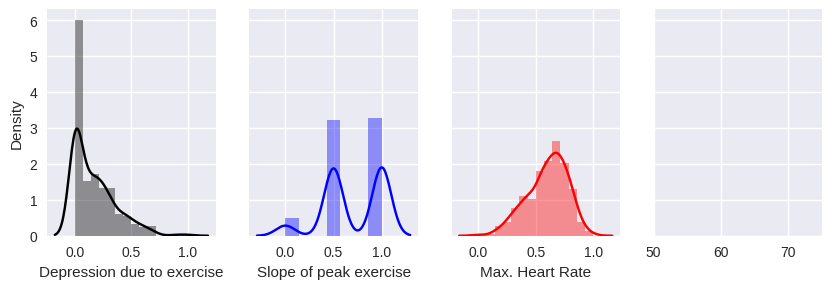

In [ ]:
# Distributions of standardized columns
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharey=True, dpi=100)
sns.distplot(encoded_data['oldpeak'] , color="black", ax=axes[0], axlabel='Depression due to exercise')
sns.distplot(encoded_data['slope'] , color="blue", ax=axes[1], axlabel='Slope of peak exercise')
sns.distplot(encoded_data['thalach'] , color="red", ax=axes[2], axlabel='Max. Heart Rate')
plt.xlim(50,75);plt.show()

# **Feature Selection**

## Correlation Matrix

In [ ]:
corr_matrix = encoded_data.corr()
correlations = abs(corr_matrix["target"]).sort_values(ascending=False)[1:]
correlations

thal_2      0.527334
cp_0        0.516015
thal_3      0.486112
ca_0        0.465590
exang       0.436757
oldpeak     0.430696
thalach     0.421741
slope       0.345877
cp_2        0.316742
sex         0.280937
ca_2        0.273998
cp_1        0.245879
ca_1        0.232412
age         0.225439
ca_3        0.210615
trestbps    0.144931
restecg     0.137230
thal_1      0.106589
cp_3        0.086957
chol        0.085239
ca_4        0.066441
fbs         0.028046
thal_0      0.007293
Name: target, dtype: float64

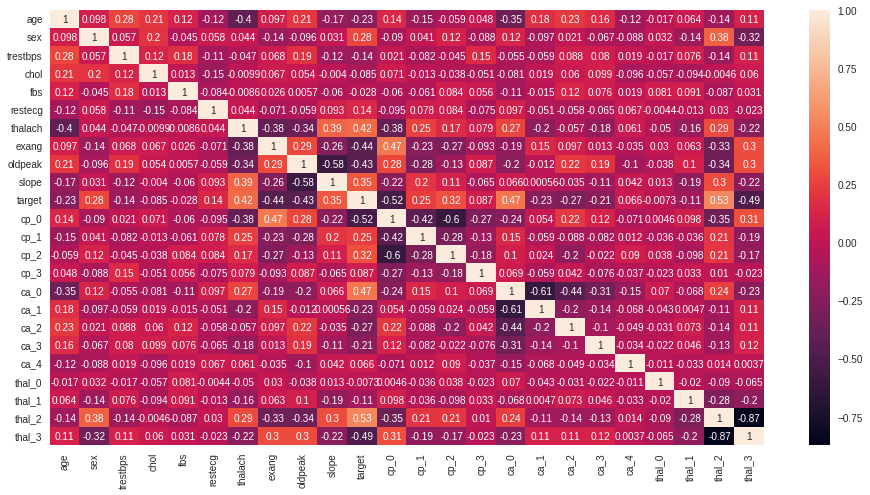

In [ ]:
import seaborn as sns

plt.figure(figsize = (16, 8))

correlation_matrix = encoded_data.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = encoded_data.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]
print("Columns to drop: ")
for features in features_to_drop:
  print(features)

Columns to drop: 
thal_3


In [ ]:
# Remove all to be dropped colums from data
encoded_data = encoded_data.drop(features_to_drop[:(len(features_to_drop))], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  target    303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [ ]:
encoded_data.to_csv('processed_heart.csv',index=False,header=True)